

# Exercice 6 - Regression lineaire multiple et inference statistique
### (suite de l'exercice 5)


Dans le problème suivant, on considère que l'on connait les notes sur l'année de n élèves dans p matières, ainsi que leurs notes à un concours specifique en fin d'année. L'année suivante, on se demande si on ne pourrait pas prédire la note des étudiants au concours en fonction de leur moyenne annuelle afin d'estimer leurs chances au concours.

On va résoudre le problème à l'aide de la regression linéaire multiple de scikitlearn (et plus à la main) et estimer à quel point les prédictions sont précises par inference statistique.



In [1]:

import numpy as np
import matplotlib.pyplot as plt



## Partie 1 -- Apprentissage/prédiction :

### <span style = "color: blue">Questions 1</span>

- Bien comprendre la fonction 'SimulateObservations2'
- A l'aide de la fonction 'SimulateObservations2', simulez un jeu de données d'apprentissage [X_l,y_l] avec n_l=30 observations et un jeu de test [X_t,y_t] avec n_t=1000 observations. Les observations seront en dimension p=10.
- Effectuez la régression linéaire multiple avec sklearn.linear_model.LinearRegression
- Représentez un nuage de points dont chaque point a pour coordonnée (y_true,y_predicted). Les observations test seront utilisées. Calculez de même la 'mean squared error' sur ces données.  

### <span style = "color: blue">Réponses 1</span>



The thetas with which the values were simulated are: [0.10178626 0.12436383 0.02408014 0.13539839 0.11445099 0.12857599
 0.03547917 0.09410907 0.12312778 0.11862838]
Mean Squared Error :  3.3693337656151323


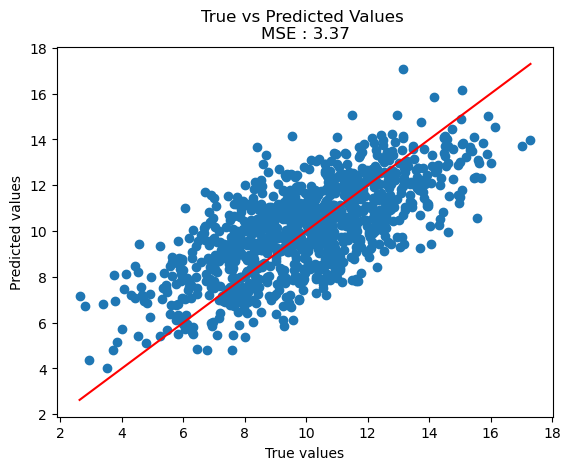

In [14]:

def SimulateObservations2(n_train,n_test,p):
  """
  n_train: number of training obserations to simulate
  n_test: number of test obserations to simulate
  p: dimension of the observations to simulate
  """
  
  ObsX_train=20.*np.random.rand(n_train,p)
  ObsX_tst=20.*np.random.rand(n_test,p)
  
  RefTheta=np.random.rand(p)
  RefTheta=RefTheta/RefTheta.sum()
  print("The thetas with which the values were simulated are: "+str(RefTheta))
  
  ObsY_train=np.dot(ObsX_train,RefTheta.reshape(p,1))+1.5*np.random.randn(n_train,1)
  ObsY_tst=np.dot(ObsX_tst,RefTheta.reshape(p,1))+1.5*np.random.randn(n_test,1)
  
  return [ObsX_train,ObsY_train,ObsX_tst,ObsY_tst,RefTheta]

n=30
p=10
[X_l,y_l,X_t,y_t,RefTheta]=SimulateObservations2(30,1000,p)



from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_l, y_l)
y_pred = lr.predict(X_t)

#calcul de la mean squared error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_t, y_pred)
print("Mean Squared Error : ", mse)

#nuage de points :
plt.figure()
plt.scatter(y_t, y_pred)
min_val = min(y_t.min(), y_pred.min())
max_val = max(y_t.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', label='y = x')
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title(f"True vs Predicted Values \nMSE : {mse:.2f}")
plt.show()


## Partie 2 -- Inference sur les erreurs : 

On fait l'hypothèse que le bruit sur les observations est Gaussien (ce qui est vrai puisqu'on a simulé les données comme ça). Nous allons alors étudier comment les erreurs d'approximation sont distribuées.

### <span style = "color: blue">Questions 2</span>

- Utilisez les fonctions np.histogram et plt.plot pour représenter la distribution de l'erreur d'approximation dans les données de la partie 1.
- La distribution de l'erreur est liée à une loi de student à n-p-1 degres de libertés. Nous n'allons pas caler cette loi à nos données mais simplement mesurer la moyenne d'erreur au carré (MSE - ou biais) dans nos données pour évaluer à quel point notre méthode est précise.

### <span style = "color: blue">Réponses 2</span>


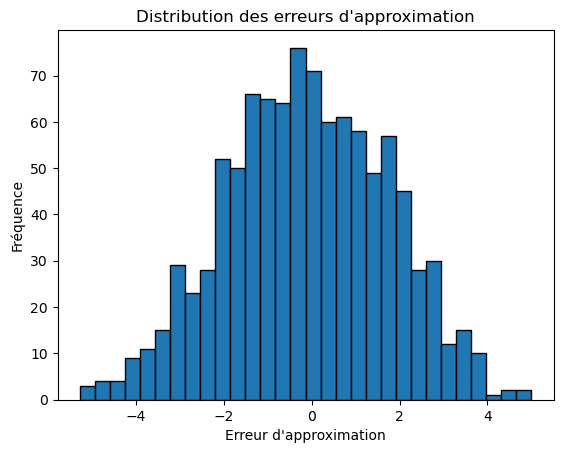

In [17]:
erreurs = y_t - y_pred  

plt.figure()
plt.hist(erreurs, bins=30, edgecolor='black')
plt.xlabel("Erreur d'approximation")
plt.ylabel("Fréquence")
plt.title("Distribution des erreurs d'approximation")
plt.show()

## Partie 3 -- Variations de l'erreur pour différentes valeurs de n ou p : 

### <span style = "color: blue">Question 3</span>

Reproduire les parties 1 et 2 de l'exercice pour différents nombres d'observations d'apprentissage (n) et différentes dimensions des observations (p) :
- *Tests 1* : (n=30,p=1) , (n=30,p=5) , (n=30,p=10) , (n=30,p=15) , (n=30,p=20) , (n=30,p=25) , (n=30,p=29)
- *Tests 2* : (n=11,p=10) ,(n=15,p=10) ,(n=20,p=10) ,(n=30,p=10) , (n=60,p=10) , (n=100,p=10)  

Aussi bien pour *Tests 1* que pour *Tests 2*, verifiez comment évolue la MSE quand n ou p varie.

### <span style = "color: blue">Réponse 3</span>


The thetas with which the values were simulated are: [1.]
The thetas with which the values were simulated are: [0.23753587 0.23719535 0.20789496 0.08009908 0.23727475]
The thetas with which the values were simulated are: [0.02229964 0.14568245 0.14437153 0.12480875 0.13353856 0.00699902
 0.16531914 0.14660115 0.00860828 0.1017715 ]
The thetas with which the values were simulated are: [0.09446746 0.1310827  0.06447576 0.07330326 0.03766424 0.07840002
 0.04041102 0.11457473 0.08142048 0.05955456 0.01663101 0.02939119
 0.03212124 0.09708986 0.04941248]
The thetas with which the values were simulated are: [0.02868352 0.0093401  0.0449766  0.07629564 0.08859952 0.06513017
 0.07599776 0.03456759 0.05120811 0.04664072 0.0727687  0.05335268
 0.06134342 0.01472979 0.07251753 0.04127736 0.02456345 0.05042423
 0.04677285 0.04081028]
The thetas with which the values were simulated are: [0.06601133 0.01065561 0.02025271 0.05426916 0.05595561 0.06555348
 0.03485163 0.05265812 0.01619536 0.01237519 0

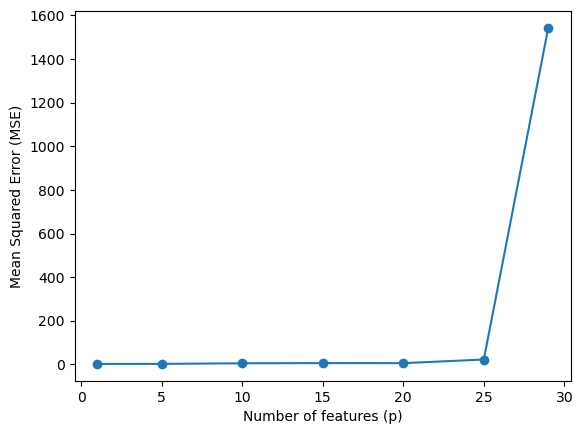

The thetas with which the values were simulated are: [0.10515456 0.10110793 0.08978644 0.23202582 0.18453991 0.04282091
 0.06425889 0.05256725 0.09170953 0.03602876]
The thetas with which the values were simulated are: [0.12676994 0.0093949  0.00963295 0.05484642 0.14626369 0.16583007
 0.19073661 0.14778152 0.00905551 0.13968838]
The thetas with which the values were simulated are: [0.10697838 0.13468722 0.1482412  0.04055808 0.06195739 0.15219724
 0.08836172 0.09817762 0.06268928 0.10615188]
The thetas with which the values were simulated are: [0.12413379 0.03571779 0.17763562 0.16806907 0.012394   0.14900504
 0.02594001 0.15420219 0.10564054 0.04726193]
The thetas with which the values were simulated are: [0.06349015 0.21119233 0.02218475 0.09888249 0.14281229 0.10290742
 0.03959477 0.0935169  0.08976604 0.13565286]
The thetas with which the values were simulated are: [0.09123105 0.15842987 0.11976276 0.09016349 0.02334704 0.04436238
 0.11804498 0.08337474 0.08618544 0.18509825]


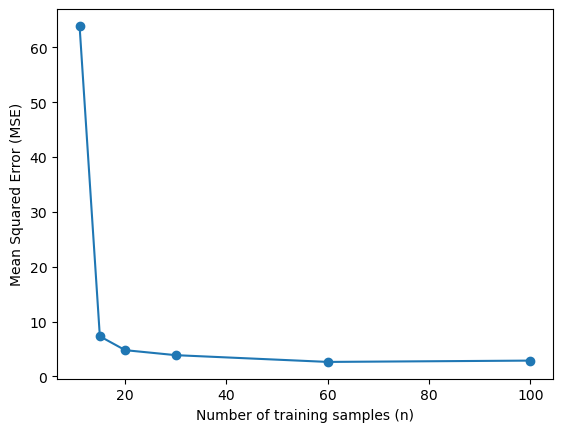

In [20]:
#Test 1
MSEs = []
I = [1, 5, 10, 15, 20, 25, 29]
for p in I :
    [X_l,y_l,X_t,y_t,RefTheta]=SimulateObservations2(30,1000,p)
    lr = LinearRegression()
    lr.fit(X_l, y_l)
    y_pred = lr.predict(X_t)
    mse = mean_squared_error(y_t, y_pred)
    MSEs.append(mse)

plt.figure()
plt.plot(I, MSEs, marker='o')
plt.xlabel("Number of features (p)")
plt.ylabel("Mean Squared Error (MSE)")
plt.show()

#Test 2
MSEs = []
N = [11, 15, 20, 30, 60, 100]
for n in N:
    [X_l,y_l,X_t,y_t,RefTheta]=SimulateObservations2(n,1000,10)
    lr = LinearRegression()
    lr.fit(X_l, y_l)
    y_pred = lr.predict(X_t)
    mse = mean_squared_error(y_t, y_pred)
    MSEs.append(mse)

plt.figure()
plt.plot(N, MSEs, marker='o')
plt.xlabel("Number of training samples (n)")
plt.ylabel("Mean Squared Error (MSE)")
plt.show()